# Figure 3 - channel selection

In [1]:
import numpy as np
import matplotlib.pylab as plt
import MEAutility as mu
from scipy.signal import resample_poly
from scipy.stats import kurtosis, linregress
from matplotlib import gridspec
from scipy import io
import numpy as np
import networkx as nx
from pathlib import Path
from pprint import pprint
import sys
import os
import matplotlib as mpl

#%matplotlib widget
%matplotlib inline

In [2]:
from axon_velocity import GraphAxonTracking, get_default_graph_velocity_params, plot_amplitude_map, plot_template

In [3]:
save_fig = True
fig_folder =  Path('figures') / "figure3"
fig_folder.mkdir(exist_ok=True, parents=True)

### Define algorithm params

In [4]:
params = get_default_graph_velocity_params()

# change params
params['detect_threshold'] = 0.001
params['kurt_threshold'] = 0.5
params['peak_std_threshold'] = 2
params['init_delay'] = 0.1
params['upsample'] = 2

pprint(params)

{'detect_threshold': 0.001,
 'distance_exp': 2,
 'init_amp_peak_ratio': 0.2,
 'init_delay': 0.1,
 'kurt_threshold': 0.5,
 'mad_threshold': 8,
 'max_distance_for_edge': 300,
 'max_distance_to_init': 200,
 'min_path_length': 100,
 'min_path_points': 5,
 'min_selected_points': 30,
 'n_neighbors': 3,
 'neighbor_radius': 100,
 'neighbor_selection': 'amp',
 'peak_std_distance': 30,
 'peak_std_threshold': 3,
 'r2_threshold': 0.9,
 'remove_isolated': True,
 'upsample': 2}


In [5]:
template_folder = Path('..') / 'data' / 'real_neuron'
template_id = "neuron_12"

locations = io.loadmat(template_folder / 'locations.mat')['locations']
tempfile = [t for t in template_folder.iterdir() if 'templates' in t.name and template_id in t.name][0]
template = io.loadmat(tempfile)["template"]

In [6]:
fs = 11600

In [7]:
gtr0 = GraphAxonTracking(template, locations, fs, verbose=True, **params)

In [8]:
gtr0.select_channels()

Channel selection

Initial channels: 20736
19584 after detection filter
4752 after kurtosis filter
8174 after peak std filter
17306 after init_delay filter
Removing isolated channels
Removed 105 isolated channels


Text(0.5, 1.0, 'Full template')

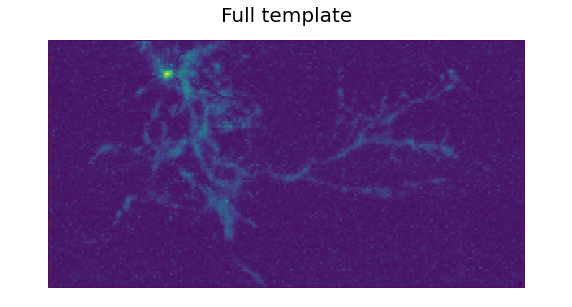

In [36]:
fig_amp = plt.figure(figsize=(10, 5))
ax_amp = fig_amp.add_subplot(111)
ax_amp = plot_amplitude_map(template, locations, log=True, ax=ax_amp)
ax_amp.set_title(f"Full template", fontsize=20)

In [9]:
vscale = 1.5 * np.max(gtr0.amplitudes)

<AxesSubplot:title={'center':'Selected after detection threshold: 0.001'}>

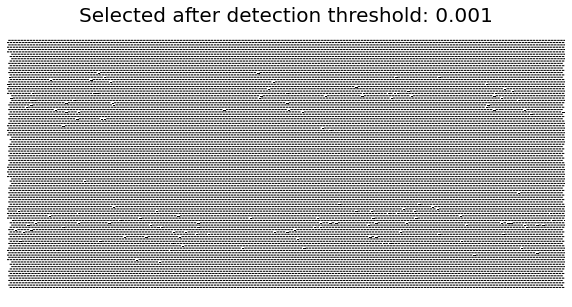

In [10]:
fig_detect = plt.figure(figsize=(10, 5))
ax_detect = fig_detect.add_subplot(111)
ax_detect.set_title(f"Selected after detection threshold: {gtr0._detect_threshold}", fontsize=20)
plot_template(gtr0.template, gtr0.locations, colors='gray', alpha=0.3, vscale=vscale, ax=ax_detect)
plot_template(gtr0.template, gtr0.locations, colors='k', channels=gtr0._selected_channels_detect,
              vscale=vscale, ax=ax_detect)

<AxesSubplot:title={'center':'Selected after kurtosis threshold: 0.3'}>

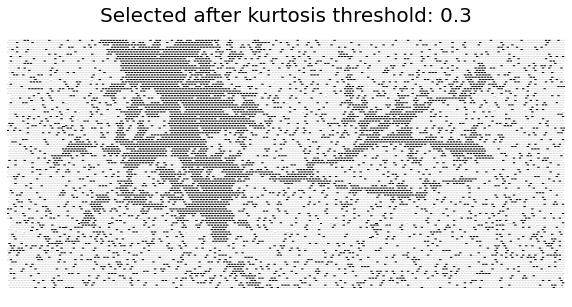

In [39]:
fig_kurt = plt.figure(figsize=(10, 5))
ax_kurt = fig_kurt.add_subplot(111)
ax_kurt.set_title(f"Selected after kurtosis threshold: {gtr0._kurt_threshold}", fontsize=20)
plot_template(gtr0.template, gtr0.locations, colors='gray', alpha=0.3, vscale=vscale, ax=ax_kurt)
plot_template(gtr0.template, gtr0.locations, colors='k', channels=gtr0._selected_channels_kurt,
              vscale=vscale, ax=ax_kurt)

<AxesSubplot:title={'center':'Selected after peak std threshold: 1 ms'}>

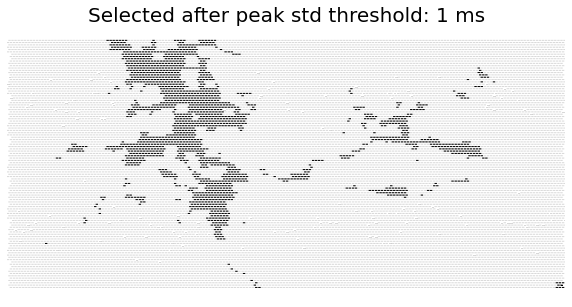

In [40]:
fig_peak = plt.figure(figsize=(10, 5))
ax_peak = fig_peak.add_subplot(111)
ax_peak.set_title(f"Selected after peak std threshold: {gtr0._peak_std_threhsold} ms", fontsize=20)
plot_template(gtr0.template, gtr0.locations, colors='gray', alpha=0.3, vscale=vscale, ax=ax_peak)
plot_template(gtr0.template, gtr0.locations, colors='k', channels=gtr0._selected_channels_peakstd,
              vscale=vscale, ax=ax_peak)

<AxesSubplot:title={'center':'Selected after init delay threshold: 0.1 ms'}>

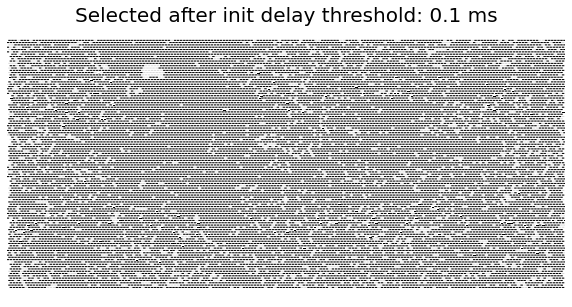

In [41]:
fig_init = plt.figure(figsize=(10, 5))
ax_init = fig_init.add_subplot(111)
ax_init.set_title(f"Selected after init delay threshold: {gtr0._init_delay} ms", fontsize=20)
plot_template(gtr0.template, gtr0.locations, colors='gray', alpha=0.3, vscale=vscale, ax=ax_init)
plot_template(gtr0.template, gtr0.locations, colors='k', channels=gtr0._selected_channels_init,
              vscale=vscale, ax=ax_init)

<AxesSubplot:title={'center':'Selected after all thresholds'}>

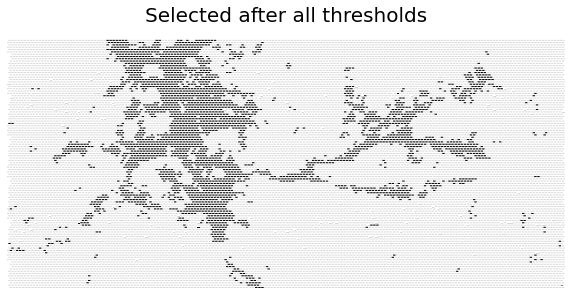

In [11]:
fig_all = plt.figure(figsize=(10, 5))
ax_all = fig_all.add_subplot(111)
ax_all.set_title(f"Selected after all thresholds", fontsize=20)
plot_template(gtr0.template, gtr0.locations, colors='gray', alpha=0.3, vscale=vscale, ax=ax_all)
plot_template(gtr0.template, gtr0.locations, colors='k', channels=gtr0.selected_channels,
              vscale=vscale, ax=ax_all)

In [43]:
# save figures
if save_fig:
    fig_amp.savefig(fig_folder / 'panelA_amp-map.png', dpi=600)
    fig_detect.savefig(fig_folder / 'panelB_channel-amp.png', dpi=600)
    fig_kurt.savefig(fig_folder / 'panelC_channel-kurt.png', dpi=600)
    fig_peak.savefig(fig_folder / 'panelD_init-peak-std.png', dpi=600)
    fig_init.savefig(fig_folder / 'panelE_init-init-peak.png', dpi=600)
    fig_all.savefig(fig_folder / 'panelF_all.png', dpi=600)